In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pathlib import Path

In [4]:
version = 'v8'
data_path = Path('data/midi')
version_path = data_path/version
orig_path = version_path/'midi_sources'

In [5]:
import music21
from ht_encode import *
import ht_encode
from fastai.data_block import get_files

### Make sure to edit config

In [6]:
enc_config.continuous=True
bar_size=1

In [7]:
h_path = orig_path/'hooktheory/xml'

In [8]:
files = get_files(h_path, extensions=['.xml'], recurse=True); files[:10]

[PosixPath('data/midi/v8/midi_sources/hooktheory/xml/w/wayne-sharpe/yu-gi-oh-theme-song/chorus.xml'),
 PosixPath('data/midi/v8/midi_sources/hooktheory/xml/w/wayne-sharpe/yu-gi-oh-theme-song/intro.xml'),
 PosixPath('data/midi/v8/midi_sources/hooktheory/xml/w/what-a-day/kiefer/chorus.xml'),
 PosixPath('data/midi/v8/midi_sources/hooktheory/xml/w/whiteflame/senbonzakura/pre-chorus.xml'),
 PosixPath('data/midi/v8/midi_sources/hooktheory/xml/w/whiteflame/senbonzakura/verse.xml'),
 PosixPath('data/midi/v8/midi_sources/hooktheory/xml/w/whiteflame/senbonzakura/chorus.xml'),
 PosixPath('data/midi/v8/midi_sources/hooktheory/xml/w/wham/last-christmas/verse.xml'),
 PosixPath('data/midi/v8/midi_sources/hooktheory/xml/w/wham/last-christmas/chorus.xml'),
 PosixPath('data/midi/v8/midi_sources/hooktheory/xml/w/wham/last-christmas/intro.xml'),
 PosixPath('data/midi/v8/midi_sources/hooktheory/xml/w/wham/freedom/chorus.xml')]

In [9]:
np.set_printoptions(edgeitems=10, threshold=40, linewidth=200)

## Testing xml to hsong

In [10]:
# Loading from specific file
# keywords = ['get-lucky', 'daft-punk', 'pre-chorus']
# keywords = ['skrillex', 'scary']
# keywords = ['idina', 'verse', 'let']
keywords = ['idina', 'intro', 'let']
# keywords = ['game-of-thrones', 'intro', 'ramin']
# keywords = ['kiss-from-a-rose', 'seal']
def contains_keywords(f): return all([k in str(f) for k in keywords])
search = [f for f in files if contains_keywords(f)]; search

[PosixPath('data/midi/v8/midi_sources/hooktheory/xml/i/idina-menzel/let-it-go/intro.xml'),
 PosixPath('data/midi/v8/midi_sources/hooktheory/xml/i/idina-menzel/let-it-go/intro-and-verse.xml')]

In [11]:
file_path = search[0]

In [12]:
# negative octave
# file_path = Path(h_path/'w/wayne-sharpe/yu-gi-oh-theme-song/chorus.xml') 

# inversions + mismatched chord/note durations
# file_path = Path(h_path/'w/wise-guys/du-doof/pre-chorus-and-chorus.xml')

# not full bar length
file_path = Path(h_path/'w/we-lost-the-sea/bogatyri/intro.xml') 

In [13]:
content = load_data(file_path)
root = xml_parser(content)
metadata, version = get_metadata(root)
segments, num_measures = get_lead_sheet(root, version)

In [14]:
# roman_to_symbol.hchord_parser(segments[0]['chords'][0], mode='1', key_offset=0)

In [15]:
song = HSong.parse(metadata, segments); song

Part[0]:
[Chords]:
[[6, 1, 3]])
[[6, 1, 3]])
[[6, 1, 3]])
[[6, 1, 3]])
[[6, 1, 3]])
[[7, 2, 4]])
[[7, 2, 4]])
[[7, 2, 4]])
[[7, 2, 4]])
[[7, 2, 4]])

[Notes]:
6
6
6
6
6
6
6
6
6

Part[1]:
[Chords]:
[[6, 1, 3]])
[[6, 1, 3]])
[[6, 1, 3]])
[[6, 1, 3]])
[[6, 1, 3]])
[[3, 5#, 7]])
[[3, 5#, 7]])
[[3, 5#, 7]])
[[3, 5#, 7]])
[[3, 5#, 7]])

[Notes]:
6
6
6
6
6
6
6
6
6
6
6
6



HMetadata(title='bogatyri', BPM='123', beats_in_measure='4', key='G#', mode='6')

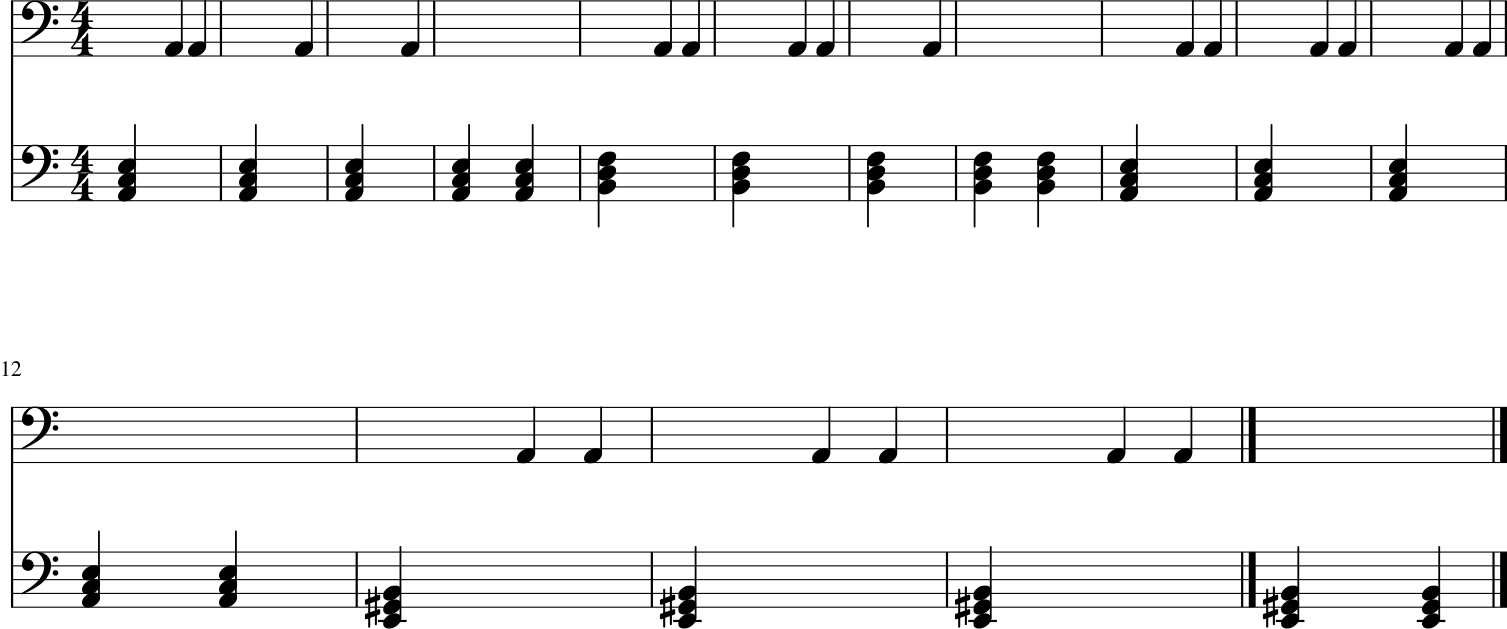

In [16]:
stream = song.to_stream()
stream.show()

In [17]:
stream.show('midi')

## Begin encoding

In [18]:
chords = song.parts[0].chords

In [19]:
encs = enc_song(song, step_size=bar_size); encs.shape

(257, 9)

## Decoding start

### NOTE: need to figure out if measure should be relative to individual parts or the whole song

In [20]:
dec_song = dec_arr(encs); dec_song

Part[0]:
[Chords]:
[[6, 1, 3]])
[[6, 1, 3]])
[[6, 1, 3]])
[[6, 1, 3]])
[[6, 1, 3]])
[[7, 2, 4]])
[[7, 2, 4]])
[[7, 2, 4]])
[[7, 2, 4]])
[[7, 2, 4]])
[[6, 1, 3]])
[[6, 1, 3]])
[[6, 1, 3]])
[[6, 1, 3]])
[[6, 1, 3]])
[[3, 5#, 7]])
[[3, 5#, 7]])
[[3, 5#, 7]])
[[3, 5#, 7]])
[[3, 5#, 7]])

[Notes]:
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6



HMetadata(title='decoded', BPM='120', beats_in_measure='4', key='C', mode='1')

In [21]:
dec_stream = dec_song.to_stream()

In [22]:
c = dec_stream.parts[1][0][0]

In [23]:
# c.offset = 0.00001

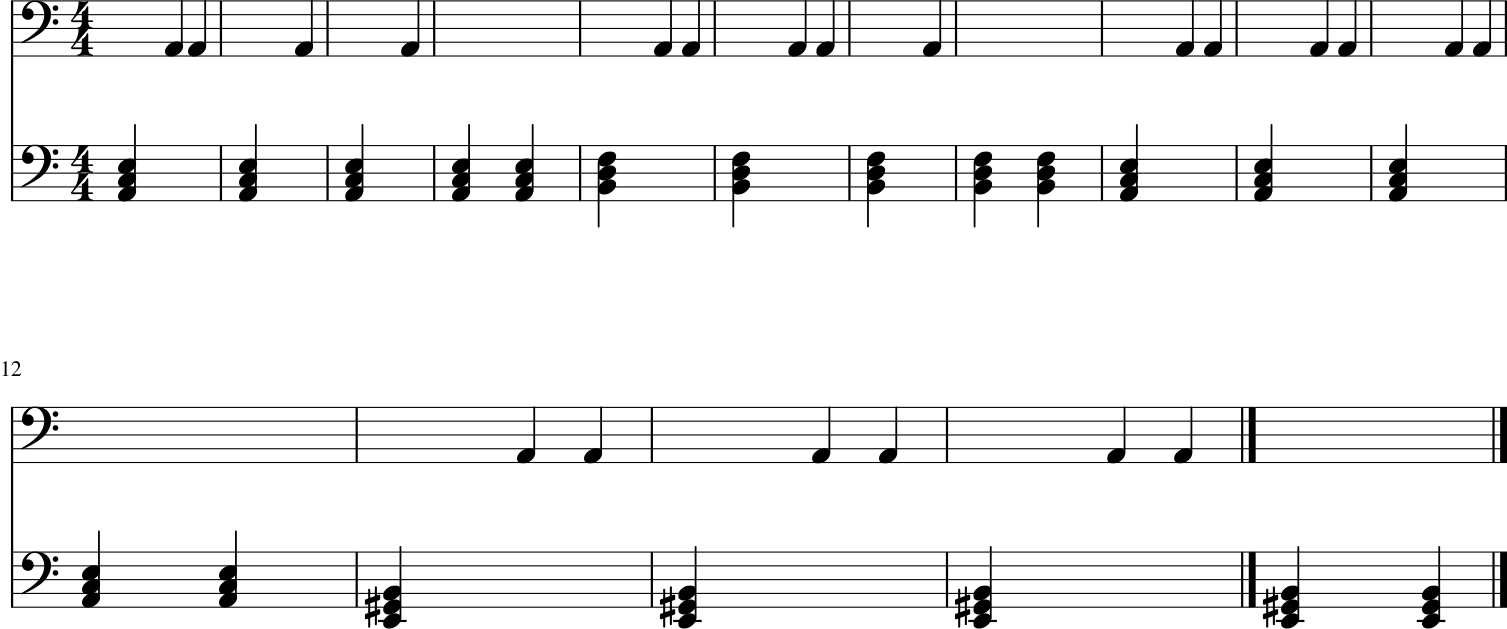

In [24]:
dec_stream.show()

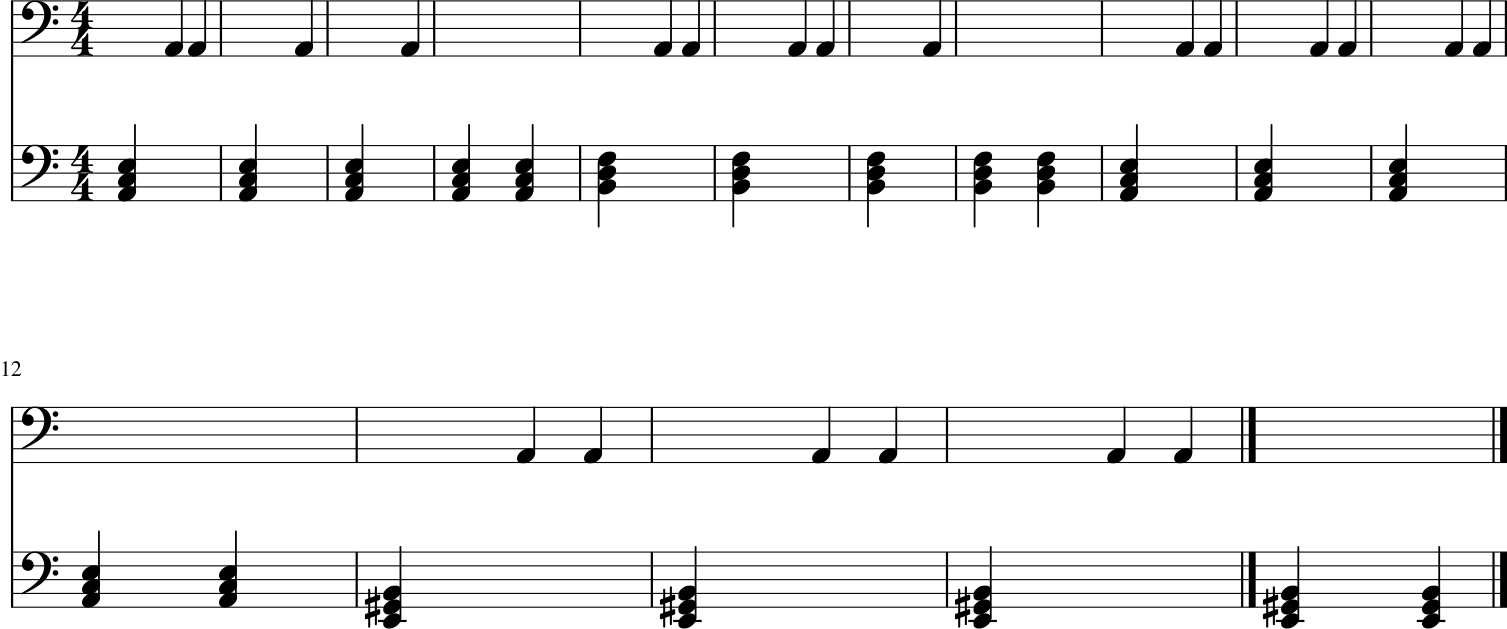

In [25]:
stream = song.to_stream()
# stream.show('midi')
stream.show()

In [26]:
dec_stream.show('midi')

### Encode all songs

In [27]:
from fastai.data_block import get_files
from data_sources import process_parallel

In [28]:
out_path = version_path/'midi_encode/np/hook_1bar_nopos/'
out_dir = out_path/'hooktheory'
h_path = orig_path/'hooktheory/xml'

In [29]:
files = get_files(h_path, extensions=['.xml'], recurse=True); files[:10]

[PosixPath('data/midi/v8/midi_sources/hooktheory/xml/w/wayne-sharpe/yu-gi-oh-theme-song/chorus.xml'),
 PosixPath('data/midi/v8/midi_sources/hooktheory/xml/w/wayne-sharpe/yu-gi-oh-theme-song/intro.xml'),
 PosixPath('data/midi/v8/midi_sources/hooktheory/xml/w/what-a-day/kiefer/chorus.xml'),
 PosixPath('data/midi/v8/midi_sources/hooktheory/xml/w/whiteflame/senbonzakura/pre-chorus.xml'),
 PosixPath('data/midi/v8/midi_sources/hooktheory/xml/w/whiteflame/senbonzakura/verse.xml'),
 PosixPath('data/midi/v8/midi_sources/hooktheory/xml/w/whiteflame/senbonzakura/chorus.xml'),
 PosixPath('data/midi/v8/midi_sources/hooktheory/xml/w/wham/last-christmas/verse.xml'),
 PosixPath('data/midi/v8/midi_sources/hooktheory/xml/w/wham/last-christmas/chorus.xml'),
 PosixPath('data/midi/v8/midi_sources/hooktheory/xml/w/wham/last-christmas/intro.xml'),
 PosixPath('data/midi/v8/midi_sources/hooktheory/xml/w/wham/freedom/chorus.xml')]

In [30]:

def process_file(file):
    out_file = file.relative_to(h_path).with_suffix('.npy')
    out_path = out_dir/out_file
    if out_path.exists(): return out_file, out_file
    song = parse_file(file)
    if song is None or int(song.metadata.beats_in_measure) != 4: return out_file, None
    out_path.parent.mkdir(parents=True, exist_ok=True)
    npenc = enc_song(song, step_size=bar_size)
    np.save(out_path, npenc)
    return out_file, out_file
    

In [31]:
content = load_data(file_path)
root = xml_parser(content)

metadata, version = get_metadata(root)
segments, num_measures = get_lead_sheet(root, version)

In [32]:
process_file(file_path)

(PosixPath('w/we-lost-the-sea/bogatyri/intro.npy'),
 PosixPath('w/we-lost-the-sea/bogatyri/intro.npy'))

In [33]:
# subset = files
# for f in subset:
#     process_file(f)

In [34]:
subset = files
encoded_files = process_parallel(process_file, subset, total=len(subset))

XML parse exception: 'NoneType' object has no attribute 'text'
XML parse exception: Unicode strings with encoding declaration are not supported. Please use bytes input or XML fragments without declaration.
XML parse exception: Unicode strings with encoding declaration are not supported. Please use bytes input or XML fragments without declaration.
XML parse exception: Unicode strings with encoding declaration are not supported. Please use bytes input or XML fragments without declaration.
XML parse exception: Unicode strings with encoding declaration are not supported. Please use bytes input or XML fragments without declaration.
XML parse exception: Unicode strings with encoding declaration are not supported. Please use bytes input or XML fragments without declaration.
XML parse exception: Unicode strings with encoding declaration are not supported. Please use bytes input or XML fragments without declaration.
XML parse exception: Unicode strings with encoding declaration are not supporte

### Databunch

In [35]:
from fastai_data import *
from fastai.text import *

In [36]:
np_files = get_files(out_dir, extensions=['.npy'], recurse=True); np_files[:10]

[PosixPath('data/midi/v8/midi_encode/np/hook_1bar_nopos/hooktheory/w/wayne-sharpe/yu-gi-oh-theme-song/chorus.npy'),
 PosixPath('data/midi/v8/midi_encode/np/hook_1bar_nopos/hooktheory/w/what-a-day/kiefer/chorus.npy'),
 PosixPath('data/midi/v8/midi_encode/np/hook_1bar_nopos/hooktheory/w/whiteflame/senbonzakura/chorus.npy'),
 PosixPath('data/midi/v8/midi_encode/np/hook_1bar_nopos/hooktheory/w/whiteflame/senbonzakura/pre-chorus.npy'),
 PosixPath('data/midi/v8/midi_encode/np/hook_1bar_nopos/hooktheory/w/whiteflame/senbonzakura/verse.npy'),
 PosixPath('data/midi/v8/midi_encode/np/hook_1bar_nopos/hooktheory/w/wham/last-christmas/chorus.npy'),
 PosixPath('data/midi/v8/midi_encode/np/hook_1bar_nopos/hooktheory/w/wham/last-christmas/intro.npy'),
 PosixPath('data/midi/v8/midi_encode/np/hook_1bar_nopos/hooktheory/w/wham/last-christmas/verse.npy'),
 PosixPath('data/midi/v8/midi_encode/np/hook_1bar_nopos/hooktheory/w/wham/freedom/chorus.npy'),
 PosixPath('data/midi/v8/midi_encode/np/hook_1bar_nopos/

In [37]:
out_path

PosixPath('data/midi/v8/midi_encode/np/hook_1bar_nopos')

In [38]:
def create_databunch(files, cache_name, batch_size=32, load_cached=False):
    if load_cached and (out_path/f'{cache_name}/train_ids.npy').exists():
        data = LMNPDataBunch.load(out_path, bs=batch_size, cache_name=cache_name)
    else:
        ps = [OpenNPFileProcessor()]

        data = (ItemList(items=files, path=out_path, processor=ps)
                .random_split_by_pct(0.01, seed=6)
                .label_const(label_cls=LMLabelList))
        data.x._bunch = LMNPDataBunch
        data = data.databunch(bs=batch_size)
        data.save(cache_name)
    return data

In [39]:
all_data = create_databunch(np_files, cache_name='tmp/all', load_cached=True)

In [40]:
all_data = create_databunch(np_files[:100], cache_name='tmp/sample', load_cached=True)

In [41]:
all_data

LMNPDataBunch;

Train: LabelList (99 items)
x: ItemList
[[ 0  0  2  0  0  0  0  2  0]
 [ 0  0  1  0  0  0  0  1  0]
 [10  7  3  0  0  0  0  1  0]
 [ 9  7  3  0  0  0  0  1  0]
 [12  6  3  0  0  0  0  1  0]
 [ 8  7  3  0  0  0  0  1  0]
 [ 7  7  3  0  0  0  0  1  0]
 [12  6  3  0  0  0  0  1  0]
 [ 8  7  3  0  0  0  0  1  0]
 [ 7  7  3  0  0  0  0  1  0]
 ...
 [ 0  0  1  6  9 13  0  4  3]
 [ 0  0  1  6  9 13  0  4  3]
 [ 0  0  1  6  9 13  0  4  3]
 [ 0  0  1  6  9 13  0  4  3]
 [ 0  0  1  6  9 13  0  4  3]
 [ 0  0  1  6  9 13  0  4  3]
 [ 0  0  1  6  9 13  0  4  3]
 [ 0  0  1  6  9 13  0  4  3]
 [ 0  0  1  6  9 13  0  4  3]
 [ 0  0  1  6  9 13  0  4  3]],[[ 0  0  2  0  0  0  0  2  0]
 [10  9  3 10 14  5  8  3  3]
 [ 7  9  3 10 14  5  8  4  3]
 [ 3  9  3 10 14  5  8  4  3]
 [ 3  9  4 10 14  5  8  4  3]
 [ 5  9  3 10 14  5  8  4  3]
 [ 5  9  4 10 14  5  8  4  3]
 [ 0  0  1 12 14  7 10  3  3]
 [ 5  9  3 12 14  7 10  4  3]
 [ 5  9  4 12 14  7 10  4  3]
 ...
 [ 0  0  1 12  4  7 11  3  3]
 [ 

In [42]:
train_ids_file = out_path/'tmp/all/train_ids.npy'
all_ids = np.load(train_ids_file)
id_cat = np.concatenate(all_ids); id_cat.shape
ax = tuple(range(len(id_cat.shape)-1))
max_vocab = id_cat.max(axis=ax)
max_vocab = (max_vocab+1).tolist(); max_vocab

[15, 13, 5, 15, 15, 15, 15, 5, 7]

In [43]:
id_cat.shape

(3247742, 9)

In [44]:
min_vocab = id_cat.min(axis=ax); min_vocab

array([0, 0, 1, 0, 0, 0, 0, 1, 0])

In [45]:
ob = next(iter(all_data.train_dl))

In [46]:
ob[0].shape

torch.Size([32, 70, 9])

In [47]:
ob[0][0,:10], ob[1][0,:10]

(tensor([[ 0,  0,  1, 10, 13,  5,  0,  4,  3],
         [ 0,  0,  1, 10, 13,  5,  0,  4,  3],
         [ 0,  0,  1, 10, 13,  5,  0,  4,  3],
         [ 0,  0,  1, 12,  3,  7, 10,  3,  6],
         [ 0,  0,  1, 12,  3,  7, 10,  4,  6],
         [ 0,  0,  1, 12,  3,  7, 10,  4,  6],
         [ 0,  0,  1, 12,  3,  7, 10,  4,  6],
         [ 0,  0,  1, 14,  5,  9, 12,  3,  6],
         [ 0,  0,  1, 14,  5,  9, 12,  4,  6],
         [ 0,  0,  1, 14,  5,  9, 12,  4,  6]]),
 tensor([[ 0,  0,  1, 10, 13,  5,  0,  4,  3],
         [ 0,  0,  1, 10, 13,  5,  0,  4,  3],
         [ 0,  0,  1, 12,  3,  7, 10,  3,  6],
         [ 0,  0,  1, 12,  3,  7, 10,  4,  6],
         [ 0,  0,  1, 12,  3,  7, 10,  4,  6],
         [ 0,  0,  1, 12,  3,  7, 10,  4,  6],
         [ 0,  0,  1, 14,  5,  9, 12,  3,  6],
         [ 0,  0,  1, 14,  5,  9, 12,  4,  6],
         [ 0,  0,  1, 14,  5,  9, 12,  4,  6],
         [ 0,  0,  1, 14,  5,  9, 12,  4,  6]]))

In [48]:
ob[0][0,:4], ob[1][0][:4]

(tensor([[ 0,  0,  1, 10, 13,  5,  0,  4,  3],
         [ 0,  0,  1, 10, 13,  5,  0,  4,  3],
         [ 0,  0,  1, 10, 13,  5,  0,  4,  3],
         [ 0,  0,  1, 12,  3,  7, 10,  3,  6]]),
 tensor([[ 0,  0,  1, 10, 13,  5,  0,  4,  3],
         [ 0,  0,  1, 10, 13,  5,  0,  4,  3],
         [ 0,  0,  1, 12,  3,  7, 10,  3,  6],
         [ 0,  0,  1, 12,  3,  7, 10,  4,  6]]))